#  Question A1: Region Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Superstore_dataset.csv')

#---------- all regions mean profit get
mean_profit_per_region = data.groupby('Region')['Profit'].mean().reset_index()
print(mean_profit_per_region)

#----------- profit < 27%  regions  identify
regions_to_discontinue = mean_profit_per_region[mean_profit_per_region['Profit'] < 27]['Region'].tolist()
print(regions_to_discontinue)



top_region = data[~data['Region'].isin(regions_to_discontinue)]
print(top_region)

plt.figure(figsize=(10, 6))
plt.bar(mean_profit_per_region['Region'], mean_profit_per_region['Profit'], color='blue')
plt.xlabel('Region')
plt.ylabel('Mean Profit')
plt.title('Mean Profit per Region')
plt.axhline(y=27, color='red', linestyle='--', label='Discontinue Threshold (27)')
plt.legend()


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

print(regions_to_discontinue)
print(top_region.shape)
print(top_region.head())


### mean profit  regions

### 27% Below Regions ( discontinued region)

In [ ]:
Central

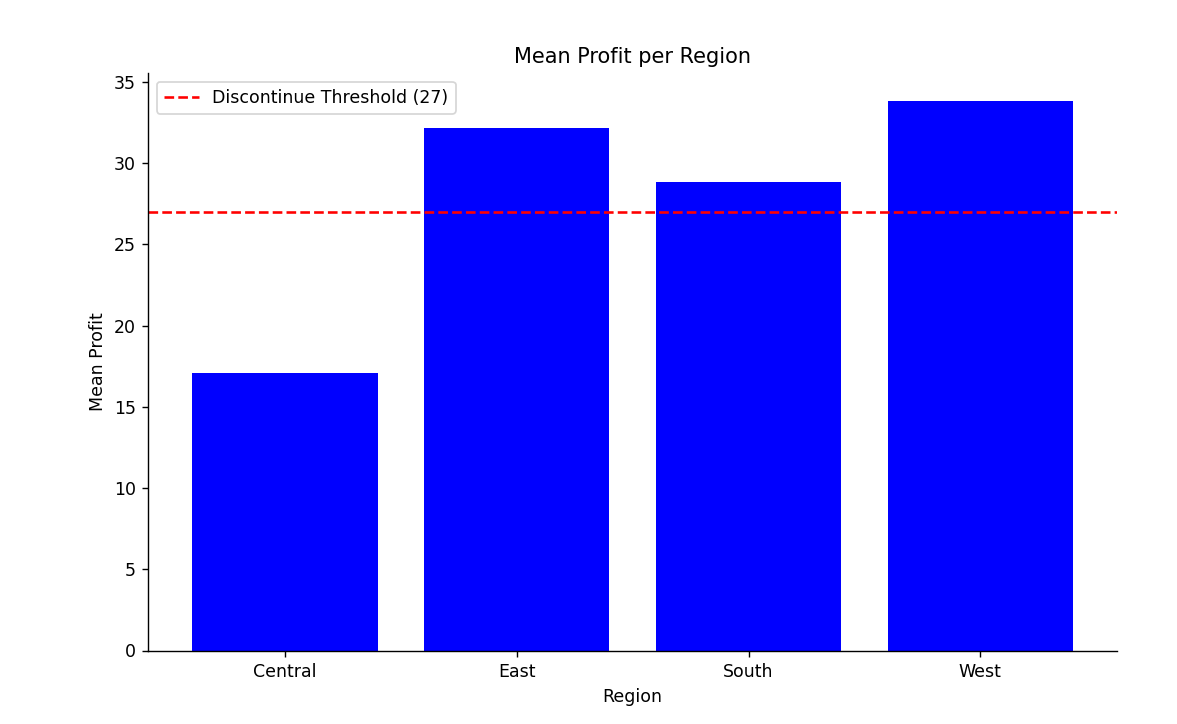

# Question A1 & A2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter


top_region = pd.read_csv('Superstore_dataset.csv')

print("Columns in top_region DataFrame:")
print(top_region.columns)


print("First 5 rows of the top_region DataFrame:")
print(top_region.head())


top_region.columns = top_region.columns.str.strip()


summary_stats = top_region.describe()


profit_mean = summary_stats['Profit']['mean']
profit_median = summary_stats['Profit']['50%']
profit_std = summary_stats['Profit']['std']

# Print interpretation
print(f"The mean profit is {profit_mean:.2f}.")
print(f"The median profit is {profit_median:.2f}.")
print(f"The standard deviation of profit is {profit_std:.2f}.")

# Calculate mean profit for each product sub-category
mean_profit_by_subcategory = top_region.groupby('Sub Category')['Profit'].mean() 
print("Mean Profit by Product Sub-Category:")
print(mean_profit_by_subcategory)

# Visualize mean profit by sub-category
mean_profit_by_subcategory.plot(kind='bar', color='lightgreen')
plt.title('Mean Profit by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Mean Profit')
plt.axhline(y=mean_profit_by_subcategory.mean(), color='red', linestyle='--', label='Average Profit Threshold')
plt.legend()

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Identify sub-categories to discontinue
average_profit = mean_profit_by_subcategory.mean()
subcategories_to_discontinue = mean_profit_by_subcategory[mean_profit_by_subcategory < average_profit].index.tolist()

print("Sub-Categories to Discontinue:", subcategories_to_discontinue)

# Create a new DataFrame for top 3 sub-categories
top_3_subcategories = mean_profit_by_subcategory.nlargest(3).index.tolist()
top_3 = top_region[top_region['Sub Category'].isin(top_3_subcategories)]

print("----------------Top 3 Product Sub-Categories:-------------")
print("Top Subcategory Names:", ", ".join(top_3_subcategories))  
print("\nFiltered DataFrame for Top 3 Subcategories:\n", top_3)
print("------------------------------------------------------")

#----------------------------------------------------------Question A3---------------------------------------------------------

pivot_table = top_3.pivot_table(
    index='Segment',    
    columns='Category', 
    values='Discount',
    aggfunc='sum'      
)

# Step 2: Save the pivot table to an Excel file
pivot_table.to_excel('Discount_analysis.xlsx', sheet_name='Discount Data')

# get highest details
highest_discount_location = pivot_table.stack().idxmax()  # Get (Segment, Category) for highest discount
highest_discount_segment, highest_discount_category = highest_discount_location

# get lowest detils
lowest_discount_location = pivot_table.stack().idxmin()  # Get (Segment, Category) for lowest discount
lowest_discount_segment, lowest_discount_category = lowest_discount_location

# get result set excel file
with ExcelWriter('Discount_analysis.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    results_df = pd.DataFrame({
        'Description': [
            f"The highest discount is offered on the product category '{highest_discount_category}', in the '{highest_discount_segment}' segment.",
            f"The lowest discount is offered on the product category '{lowest_discount_category}', in the '{lowest_discount_segment}' segment."
        ]
    })
    results_df.to_excel(writer, sheet_name='Discount Data', startrow=len(pivot_table) + 3, index=False)

print("'Discount_analysis file create done...")

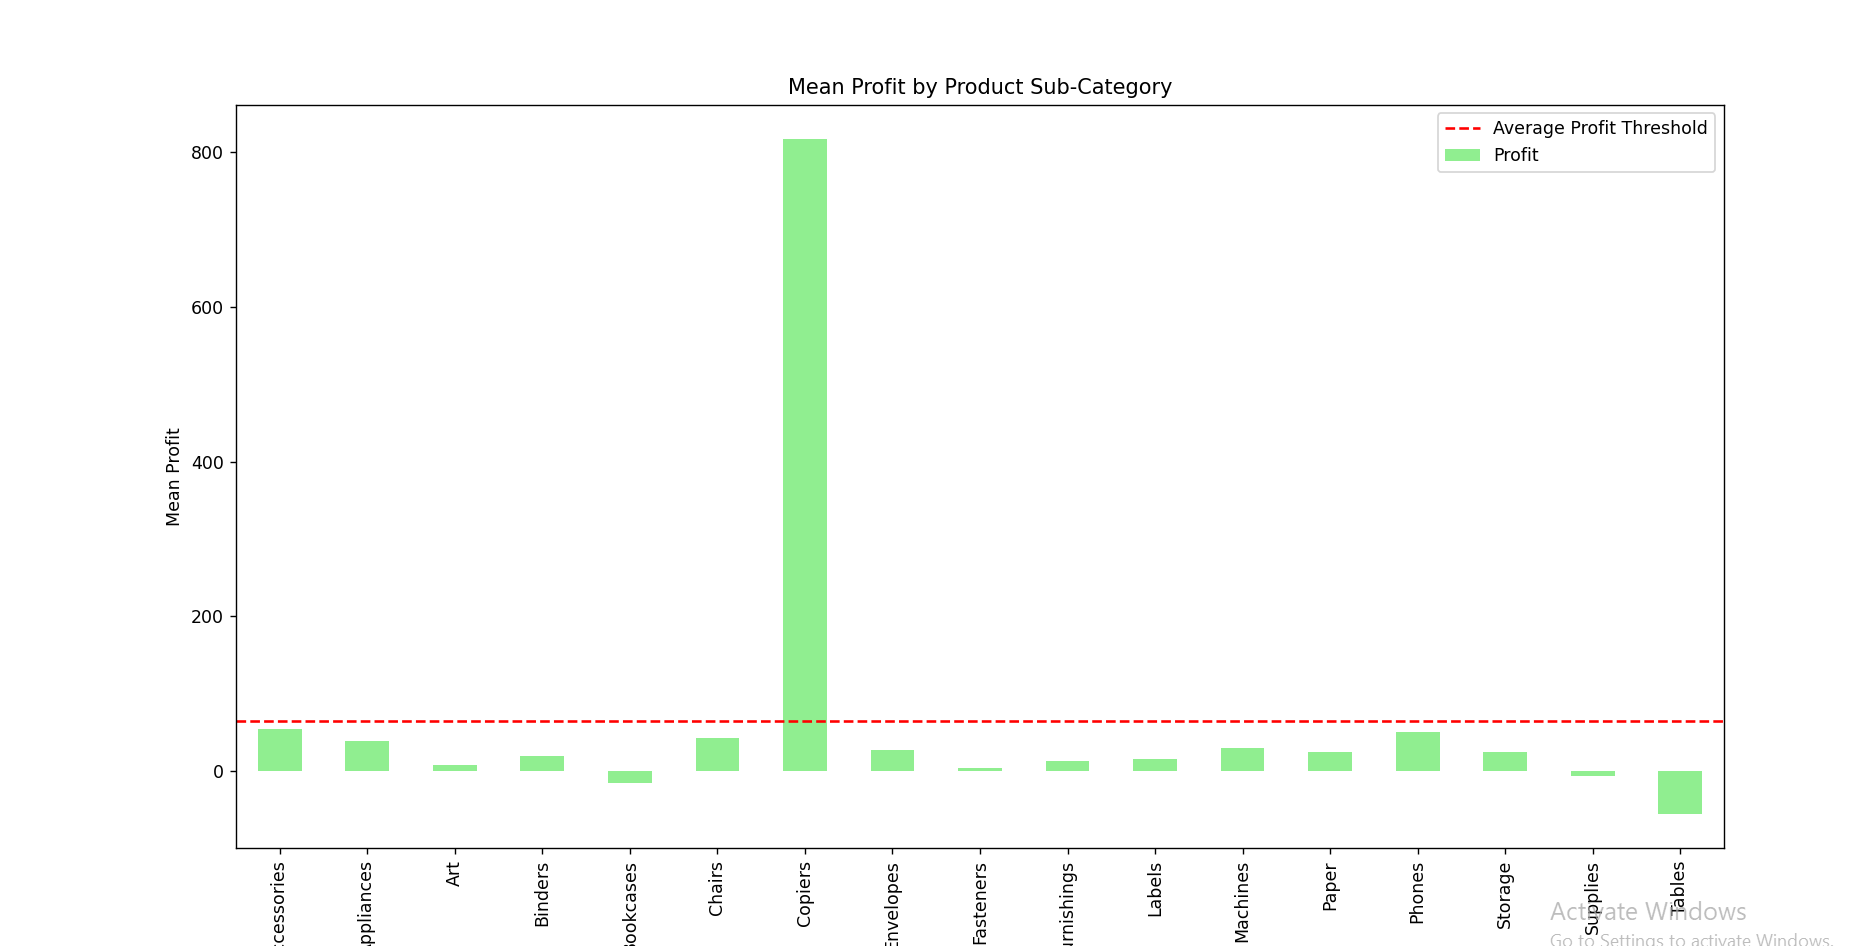

### top region dataframe


### Mean Profit by Product Sub-Category

### Sub-Categories to Discontinue

### Top 3 Product Sub-Categories

### Top 3 products sub-categires

### Question A3: Discount analysis for Category and Segment


# Task

In [ ]:

destination = input("Enter the destination you want to travel to: ")


if destination == "Paris":
    message = "Bonjour! Enjoy your flight to the romantic city of Paris!"
elif destination == "Tokyo":
    message = "Konnichiwa! Have a great time exploring the vibrant city of Tokyo!"
elif destination == "New York":
    message = "Welcome to the Big Apple! Enjoy your stay in New York City!"
elif destination == "Sydney":
    message = "G'day mate! Have a fantastic trip to the beautiful city of Sydney!"
else:
    message = "Safe travels to your chosen destination!"


print(message)
